## Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import re
from PIL import Image

In [2]:
df = pd.read_csv('src/data/grailed.csv')

In [3]:
colordf = pd.read_csv('./src/data/colors.csv')

## Data Cleaning

In [4]:
# Drop double index

df.drop(columns = 'Unnamed: 0', inplace = True)

In [5]:
# Drop NaN Values (and rows) from a mostly-complete column

df.dropna(subset = ['Location'], inplace= True)

In [6]:
# Convert and reformat price columns

def dollars_to_int(column):
    column = column.str.replace('$', '')
    column = column.str.replace(',', '')
    return pd.to_numeric(column) 

df.Price = dollars_to_int(df.Price)
df.NewPrice = dollars_to_int(df.NewPrice)
df.OldPrice = dollars_to_int(df.OldPrice)

In [7]:
# Reformat current number of listings column and filling NaN values

def format_listings(column):
    listings = []
    for i in column:
        try:
            listings.append(int(i.split()[0]))
        except AttributeError:
            listings.append(i)
    return listings

df.CurrentListings = format_listings(df.CurrentListings)
df.CurrentListings.fillna(0, inplace=True)

In [8]:
# Create dummy columns for every size

size_dummies = pd.get_dummies(df.Size)
df.drop(columns= 'Size', inplace = True)
size_dummies.drop(columns = 'XXS', inplace = True)

In [9]:
# Add dummy columns to df

df = pd.concat([df, size_dummies], axis = 1)

In [10]:
# Consolidate price columns

df.Price.fillna(df.NewPrice, inplace = True)

In [11]:
# Create column for amount of price dropped

df['PriceDropped'] = df.OldPrice - df.NewPrice

In [12]:
# Fill rows with no price drops with 0

df['PriceDropped'].fillna(0, inplace = True)

In [13]:
# Drop old columns

df.drop(columns = ['OldPrice', 'NewPrice'], inplace = True)

In [14]:
# Isolate country names in Location column

df.Location = df.Location.str.replace('Shipping: ', '')
df.Location = df.Location.str.replace(' to', '')

In [15]:
# Create location dummy columns and add to df

loc_dummies = pd.get_dummies(df.Location)
loc_dummies.drop(columns = ['- Ask for shipping', 'Add a comment'], inplace = True)
df = pd.concat([df, loc_dummies], axis = 1)

In [16]:
# Reformat Feedback column and fill NA values

df.Feedback = df.Feedback.str.replace(' Feedback', '')
df.Feedback = pd.to_numeric(df.Feedback)
df.Feedback.fillna(0, inplace = True)

In [17]:
# Reformat Number of Items Sold column

df.Sold = df.Sold.str.replace('(', '')
df.Sold = df.Sold.str.replace(')', '')
df.Sold = pd.to_numeric(df.Sold)
df.Sold.fillna(0, inplace = True)

In [18]:
# Fill NaN values in Follower Count with 0

df.FollowerCount.fillna(0, inplace = True)

In [21]:
# Bin the designer category into a manageable number of features

for i, name in enumerate(df.Designer):
    name = str(name)
    name.strip()
    if 'NIKE' in name:
        df.Designer[i] = 'NIKE'
    elif 'ADIDAS' in name:
        df.Designer[i] = 'ADIDAS'
    elif 'COMME DES GARCONS' in name:
        df.Designer[i] = 'COMME DES GARCONS'
    elif 'SUPREME' in name:
        df.Designer[i] = 'SUPREME'
    elif 'PALACE' in name:
        df.Designer[i] = 'PALACE'
    elif 'CHROME' in name:
        df.Designer[i] = 'CHROME HEARTS'
    elif 'FEAR' in name:
        df.Designer[i] = 'FEAR OF GOD'
    elif 'WHITE' in name:
        df.Designer[i] = 'OFF WHITE'
    elif 'KAPITAL' in name:
        df.Designer[i] = 'KAPITAL'
    elif 'BAPE' in name:
        df.Designer[i] = 'BAPE'
    elif 'KANYE' in name or 'YEEZY' in name:
        df.Designer[i] = 'YEEZY SEASON'
    elif 'LAUREN' in name:
        df.Designer[i] = 'RALPH LAUREN'
    elif 'ISSEY' in name or 'YAMAMOTO' in name or 'JAPANESE DESIGNER' in name:
        df.Designer[i] = 'JAPANESE DESIGNER'
    elif 'LAURENT' in name:
        df.Designer[i] = 'SAINT LAURENT'
    elif 'ACNE' in name:
        df.Designer[i] = 'ACNE STUDIOS'
    elif 'RAF' in name:
        df.Designer[i] = 'RAF SIMMONS'
    elif 'VETEMENTS' in name:
        df.Designer[i] = 'VETEMENTS'
    elif 'GIVENCHY' in name:
        df.Designer[i] = 'GIVENCHY'
    elif 'OWENS' in name:
        df.Designer[i] = 'RICK OWENS'
    elif 'GUCCI' in name:
        df.Designer[i] = 'GUCCI'
    elif 'PRADA' in name:
        df.Designer[i] = 'PRADA'
    elif 'MARGIELA' in name:
        df.Designer[i] = 'MAISON MARGIELA'
    elif 'UNIQLO' in name:
        df.Designer[i] = 'UNIQLO'
    elif 'SOCIAL' in name:
        df.Designer[i] = 'ANTI SOCIAL SOCIAL CLUB'
    elif 'STUSSY' in name:
        df.Designer[i] = 'STUSSY'
    elif 'DISNEY' in name:
        df.Designer[i] = 'DISNEY'
    elif 'CHAMPION' in name:
        df.Designer[i] = 'CHAMPION'
    elif 'HAWAIIAN' in name or 'CRAZY SHIRTS' in name or 'SURF' in name:
        df.Designer[i] = 'HAWAIIAN SHIRT'
    elif 'BAND TEES' in name:
        df.Designer[i] = 'BAND TEES'
    elif 'JAPANESE BRAND' in name:
        df.Designer[i] = 'JAPANESE BRAND'
    elif 'STREETWEAR' in name:
        df.Designer[i] = 'STREETWEAR'
    elif 'VINTAGE' in name:
        df.Designer[i] = 'VINTAGE'
    else:
        df.Designer[i] = 'MISC'
    

In [22]:
df.Designer.sort_values().unique()

array(['ACNE STUDIOS', 'ADIDAS', 'ANTI SOCIAL SOCIAL CLUB', 'BAND TEES',
       'BAPE', 'CHAMPION', 'CHROME HEARTS', 'COMME DES GARCONS', 'DIOR',
       'DISNEY', 'FEAR OF GOD', 'GIVENCHY', 'GUCCI', 'HAWAIIAN SHIRT',
       'JAPANESE BRAND', 'JAPANESE DESIGNER', 'KAPITAL',
       'MAISON MARGIELA', 'MISC', 'NIKE', 'OFF WHITE', 'PALACE', 'PRADA',
       'RAF SIMMONS', 'RALPH LAUREN', 'RICK OWENS', 'STREETWEAR',
       'STUSSY', 'SUPREME', 'UNIQLO', 'VETEMENTS', 'VINTAGE',
       'YEEZY SEASON'], dtype=object)

In [23]:
# Create dummy columns for binned designers and add to df

designers = pd.get_dummies(df.Designer)
designers.drop(columns= 'DISNEY', inplace = True)
df = pd.concat([df, designers], axis = 1)

In [24]:
df = df.dropna(subset=['Name'])

In [25]:
# Merge color DataFrame with df

colordf.set_index('Unnamed: 0', inplace = True)
maindf = df.merge(colordf, left_index=True, right_index=True)

In [26]:
# Convert color tuples back to int

maindf['0'] = maindf['0'].apply(lambda x: eval(x))
maindf['1'] = maindf['1'].apply(lambda x: eval(x))
maindf['2'] = maindf['2'].apply(lambda x: eval(x))

## EDA

### Using Euclidean distance to calculate color similarity

For EDA, my first step was to develope some functions to test the efficacy of my image processing from the previous notebook. I used SciPy's spatial distance function to calculate the relative distance of the colors throughout my dataset with those of an input item and return the closest matches. 

These functions should provide the foundation for an image search engine of the dataset. 

In [49]:
import scipy.spatial.distance as dist

In [28]:
def find_closest_colors(list_of_tuples, list_of_columns, dataframe):
    
    # Creating an empty list for the distances that will be caculated
    output = []
    
    # Iterating through the dataframe and comparing each color to those of my input image with
    # RGB values expressed as 3d coordinates, then taking the sum of all distances and saving as
    # a tuple with each index number
    for i in dataframe.index:
        output.append((sum(
            [dist.euclidean(list_of_tuples[0], list_of_columns[0][i]),
            dist.euclidean(list_of_tuples[1], list_of_columns[1][i]),
            dist.euclidean(list_of_tuples[2], list_of_columns[2][i])]), i))
    
    # Taking the indices of the 5 closest items, plus the original (it will always be first because
    # its distance to itself is 0)
    indices = [i[1] for i in sorted(output)[0:6]]
    
    # Returning the DataFrame rows of the nearest color palettes
    return dataframe.iloc[indices]

In [47]:
list_of_tuples = [maindf['0'][0], maindf['1'][0], maindf['2'][0]]
list_of_columns = [maindf['0'], maindf['1'], maindf['2']]

In [30]:
find_closest_colors(list_of_tuples, list_of_columns, maindf)

Name              Designer  Price  \
0      Bape Varsity style Jacket Bathing Ape                  BAPE  155.0   
168             Vlone Neighborhood Skull Tee  NEIGHBORHOOD × VLONE  135.0   
2228  North Face Never Stop Exploring Hoodie        THE NORTH FACE   22.0   
8533       Vintage Patagonia Big Logo Hoodie   PATAGONIA × VINTAGE   72.0   
5634       Head🔥Guess Spellout Big Logo Tees                 GUESS  200.0   
8043            Fred Perry tracksuit black L  FRED PERRY × VINTAGE    3.0   

                    Time    LastBump  \
0     about 14 hours ago         NaN   
168           2 days ago         NaN   
2228      14 minutes ago    (7 days)   
8533        3 months ago  (4 months)   
5634    about 1 hour ago   (23 days)   
8043      23 minutes ago  (3 months)   

                                                   Link            Username  \
0     https://www.grailed.com/listings/18766603-bape...          oghypeshop   
168   https://www.grailed.com/listings/18739497-neig...             nateszn   
2228  https://www.grailed.com/listings/18626417-the-...  dominicschlossberg   
8533  https://www.grailed.com/listings/16345499-pata...   ildargabidull4709   
5634  https://www.grailed.com/listings/18252620-gues...        Vaultwearism   
8043  https://www.grailed.com/listings/17023888-fred...              Migape   

       Sold  Feedback  CurrentListings  ... STREETWEAR STUSSY SUPREME  UNIQLO  \
0     122.0      77.0             59.0  ...          0      0       0       0   
168   172.0      84.0             11.0  ...          0      0       0       0   
2228    8.0       0.0             16.0  ...          0      0       0       0   
8533   69.0      30.0             70.0  ...          0      0       0       0   
5634  161.0      84.0           1015.0  ...          0      0       0       0   
8043  565.0     276.0             54.0  ...          0      0       0       0   

     VETEMENTS VINTAGE YEEZY SEASON                0                1  \
0            0       0            0  (218, 196, 167)  (114, 107, 138)   
168          0       0            0  (181, 141, 139)  (111, 122, 135)   
2228         0       1            0  (188, 186, 183)  (124, 132, 124)   
8533         0       0            0   (34, 137, 204)  (110, 112, 117)   
5634         0       1            0  (197, 171, 153)  (106, 110, 138)   
8043         0       0            0  (217, 219, 176)   (117, 139, 80)   

                    2  
0     (123, 124, 118)  
168     (83, 94, 113)  
2228  (124, 124, 132)  
8533   (98, 109, 114)  
5634  (124, 124, 116)  
8043  (120, 122, 132)  

[6 rows x 67 columns]

Now that I can pull the indices of the closest matches, the next step is to create a function that displays the corresponding image without the background dropped out. Then I can test on a few different images.

In [56]:
def display_closest_colors(item_index, list_of_columns, dataframe):
    
    # Get RGB data from the target item
    tuples = [list_of_columns[0][item_index],
              list_of_columns[1][item_index],
              list_of_columns[2][item_index]]
    
    # Create and empty list for euclidean distance
    output = []
    
    # Iterate through the dataframe and find euclidean distance between each of the colors of
    # each item in the dataframe and the target, then calculate the total distance between all
    # three colors. Save to the list as a tuple- the first value is the sum Euclidean distance,
    # the second is the index of the item
    for i in dataframe.index:
        output.append((sum(
            [dist.euclidean(tuples[0], list_of_columns[0][i]),
            dist.euclidean(tuples[1], list_of_columns[1][i]),
            dist.euclidean(tuples[2], list_of_columns[2][i])]), i))
    
    # Sort the euclidean distances and pull the 6 closest entries (the first one will always be
    # target item as its distance to itself is 0)
    indices = [i[1] for i in sorted(output)[0:7]]
    images = []
    
    # Open the images from each of the closest images
    for i in indices:
        images.append(Image.open(f'./src/images/{i}.jpg'))

    # Display the original image and top five closest
    fig, ax = plt.subplots(2, 3, figsize = (10,6))

    # ax[0,0].tick_params(
    # axis='x',          # changes apply to the x-axis
    # which='both',      # both major and minor ticks are affected
    # bottom=False,      # ticks along the bottom edge are off
    # top=False,         # ticks along the top edge are off
    # labelbottom=False) # labels along the bottom edge are off

    ax[0,0].imshow(images[0])
    ax[0,0].set_title('Original Image')
    ax[0,1].imshow(images[2])
    ax[0,2].imshow(images[3])
    ax[1,0].imshow(images[4])
    ax[1,1].imshow(images[5])
    ax[1,2].imshow(images[6])
    
    return plt.show()

In [ ]:
I chose to use some of the same images as in the image_process notebook in order to see how successful my removal of backgrounds was as well as the general similarliy of the items.

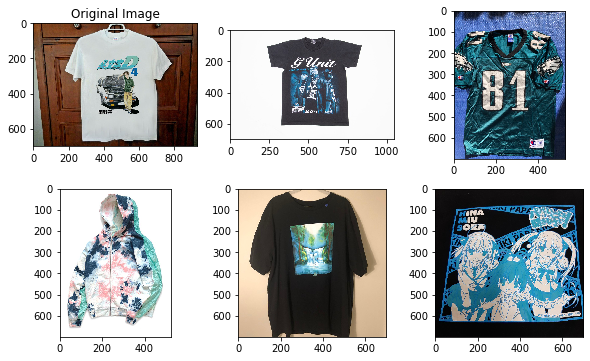

In [57]:
display_closest_colors(127, list_of_columns, maindf)

These tests seem to indicate that the background removal was a success.

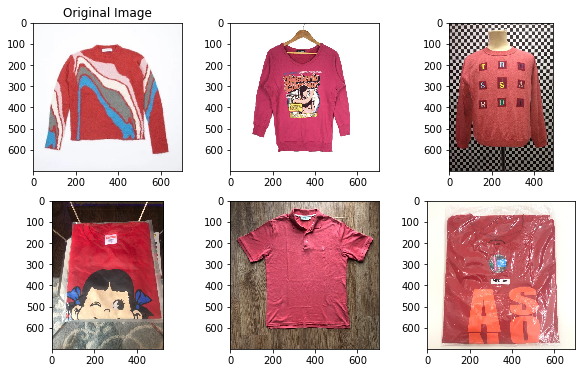

In [34]:
display_closest_colors(4363, list_of_columns, maindf)

Dense color patterns like this work but with less efficacy- it may be worthwhile later to make a second pass at the data and gather a larger palette.

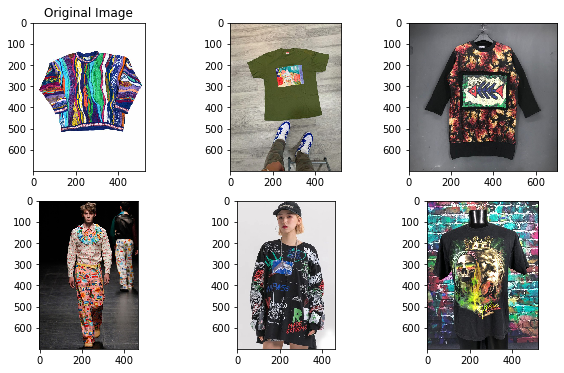

In [234]:
display_closest_colors(1180, list_of_columns, maindf)

Here's another example of a busy background that the filter has managed to exclude completely.

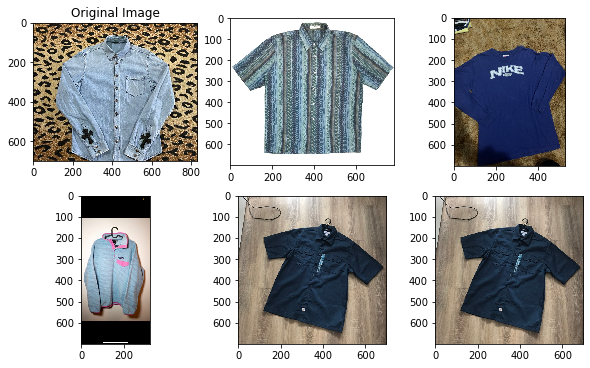

In [35]:
display_closest_colors(306, list_of_columns, maindf)

Below we can see the filter has found a different listing for the same item, achieving one goal of this project.

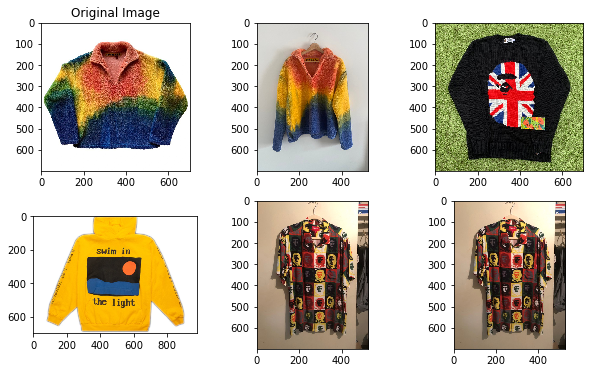

In [292]:
display_closest_colors(391, list_of_columns, maindf)

Success! There are some cases where the matches aren't perfect, but I think once I factor in the rest of my features I should be able to narrow to the most relevant results.

Now to inspect the rest of my data.

In [335]:
# Create average colors map

for i in maindf['0']:
    one = []
    two = []
    three = []
    one.append(i[0])
    two.append(i[1])
    three.append(i[2])
    average_color = (np.mean(one), np.mean(two), np.mean(three))

### Checking the data for Multicollinearity

Next I created a correlation heatmap in order to check for collinearity in my data before fitting a couple of simple linear models. While there are some sections of high correlation in the dummy variables and number of sold/number of feedback, overall this data has extremely low correlation across the board. 

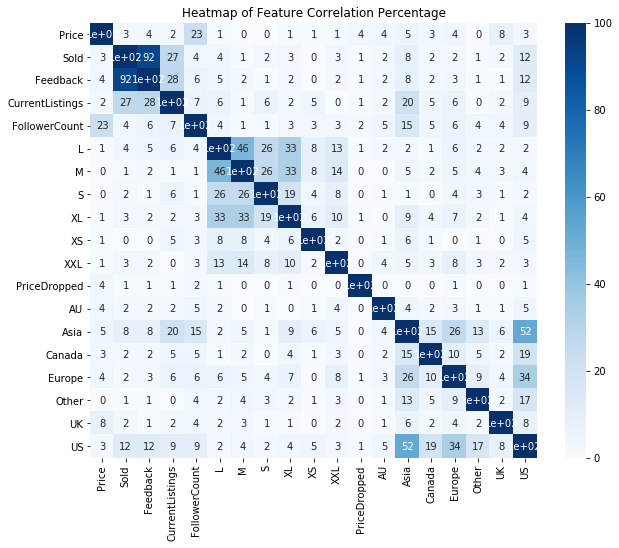

In [38]:
fig, ax = plt.subplots(figsize = (10,8))
sns.heatmap((round(abs(df[['Name', 'Designer', 'Price', 'Time', 'LastBump', 'Link', 'Username',
       'Sold', 'Feedback', 'CurrentListings', 'Description', 'ProfileLink',
       'FeedbackLink', 'FollowerCount', 'FullSize', 'PostedTime', 'BumpedTime',
       'Location', 'L', 'M', 'S', 'XL', 'XS', 'XXL', 'PriceDropped', 'AU',
       'Asia', 'Canada', 'Europe', 'Other', 'UK', 'US']].corr()), 2)*100), annot = True, cmap = 'Blues')
plt.title('Heatmap of Feature Correlation Percentage');

### Creating TF-IDF features

In [33]:
import nltk
from nltk import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer 

In [28]:
maindf.Description

0        Bape Varsity Jacket\nSize M fits true\nRelease...
1        Brand : Vintage Nike sunfaded mini swoosh blac...
2        Comes des garçons black hoodie\nFrom Dover str...
3        90s Faded Uni Blank Tee. Size Medium.\nPit To ...
4        Mens medium\nGood condition other than some we...
                               ...                        
10095    Thanks for favorites our store so that you wil...
10096    Rare!! SUZUKI Sweatshirt Crewneck Small Logo M...
10097             New, never worn. Condition 10/10, size M
10098    90' S Champion Spellout Big Logo Reverse Weave...
10099    Used and signs of wear on buttons as pictured....
Name: Description, Length: 10000, dtype: object

In [309]:
# tokenizer = RegexpTokenizer(r'[a-zA-Z][^0-9\/]+')

# df['TokenizedDesc'] = df.Description.apply(lambda x: nltk.word_tokenize(x.lower()))

# stop_words=set(stopwords.words("english"))

# df['TokenizedDesc'] = df['TokenizedDesc'].apply(lambda x: [item for item in x if item not in stop_words])

In [310]:
# df.TokenizedDesc

0        [bape, varsity, jacket, size, fits, true, rele...
1        [brand, :, vintage, nike, sunfaded, mini, swoo...
2        [comes, des, garçons, black, hoodie, dover, st...
3        [90s, faded, uni, blank, tee, ., size, medium,...
4        [mens, medium, good, condition, wear, sleeve, ...
                               ...                        
10095    [thanks, favorites, store, able, find, us, ple...
10096    [rare, !, !, suzuki, sweatshirt, crewneck, sma...
10097    [new, ,, never, worn, ., condition, 10/10, ,, ...
10098    [90, ', champion, spellout, big, logo, reverse...
10099    [used, signs, wear, buttons, pictured, ., apar...
Name: TokenizedDesc, Length: 10000, dtype: object

In [41]:
maindf.Description = maindf.Description.str.replace('\n', ' ')
maindf.Description = maindf.Description.str.replace('[^a-zA-Z ]', '')

In [34]:
lemmatizer = WordNetLemmatizer()
maindf.Description.apply(lambda x: lemmatizer.lemmatize(x))

0        Bape Varsity Jacket Size M fits true Released ...
1        Brand  Vintage Nike sunfaded mini swoosh black...
2        Comes des garons black hoodie From Dover stree...
3        s Faded Uni Blank Tee Size Medium Pit To Pit  ...
4        Mens medium Good condition other than some wea...
                               ...                        
10095    Thanks for favorites our store so that you wil...
10096    Rare SUZUKI Sweatshirt Crewneck Small Logo Mot...
10097                     New never worn Condition  size M
10098     S Champion Spellout Big Logo Reverse Weave Sw...
10099    Used and signs of wear on buttons as pictured ...
Name: Description, Length: 10000, dtype: object

In [31]:
tf=TfidfVectorizer(stop_words= {'english'}, analyzer= 'word')
text_tf= tf.fit_transform(maindf['Description'])
text_tf.data

array([0.28146096, 0.12237333, 0.08025019, ..., 0.15189882, 0.11133635,
       0.09275571])

In [42]:
#stem or lemmatize first?

feature_names = tf.get_feature_names()
feature_names[0:100]

['aa',
 'aaa',
 'aaana',
 'aaliyah',
 'aap',
 'aape',
 'ab',
 'abandonment',
 'abathing',
 'abc',
 'abcs',
 'abdomen',
 'abe',
 'abilities',
 'ability',
 'able',
 'ableready',
 'abloh',
 'ablohs',
 'about',
 'above',
 'absence',
 'absolute',
 'absolutely',
 'abstract',
 'absurd',
 'abt',
 'abvhvn',
 'abyss',
 'ac',
 'academia',
 'academy',
 'accapted',
 'accent',
 'accented',
 'accents',
 'accepeted',
 'accept',
 'acceptable',
 'acceptance',
 'acceptd',
 'accepted',
 'acceptedbecause',
 'acceptedpaypal',
 'acceptedso',
 'accepting',
 'accepts',
 'access',
 'accessible',
 'accessories',
 'accettiamo',
 'accident',
 'accidentally',
 'acclaimed',
 'accommodate',
 'accommodating',
 'accompanied',
 'accompanying',
 'accomplishments',
 'according',
 'accordingly',
 'account',
 'accounts',
 'accpet',
 'accurate',
 'accurately',
 'accusationshave',
 'acdc',
 'ace',
 'acetate',
 'acg',
 'acid',
 'ackermann',
 'acknowledge',
 'acknowledged',
 'acknowledges',
 'acknowledging',
 'acknowlege',
 'ac

In [263]:
df_model = maindf[['Price', 
                 'Sold', 
                 'Feedback', 
                 'CurrentListings', 
                 'FollowerCount', 
                 'L', 'M', 'S', 'XL', 'XS', 'XXL',
                 'PriceDropped',
                 'AU', 'Asia', 'Canada', 'Europe', 'UK', 'US',
                 'ACNE STUDIOS',
                 'ADIDAS',
                 'ANTI SOCIAL SOCIAL CLUB',
                 'BAND TEES',
                 'BAPE',
                 'CHAMPION',
                 'CHROME HEARTS', 
                 'COMME DES GARCONS', 
                 'FEAR OF GOD', 
                 'GIVENCHY', 
                 'GUCCI', 
                 'HAWAIIAN SHIRT', 
                 'JAPANESE BRAND', 
                 'JAPANESE DESIGNER', 
                 'KAPITAL', 
                 'MAISON MARGIELA', 
                 'MISC', 
                 'NIKE', 
                 'OFF WHITE', 
                 'PALACE', 
                 'PRADA', 
                 'RAF SIMMONS', 
                 'RALPH LAUREN', 
                 'RICK OWENS', 
                 'STREETWEAR', 
                 'STUSSY', 
                 'SUPREME', 
                 'UNIQLO',
                 'VETEMENTS', 
                 'VINTAGE', 
                 'YEEZY SEASON']]

## Simple Linear Modeling

In [77]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA
import seaborn as sns

In [264]:
X = df_model.drop(columns = 'Feedback')
y = df_model.Feedback

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [286]:
print('Likes Standard Deviation: ', y.std())
print('Mean Likes: ', y.mean())
print('Median Likes: ', y.median())

Likes Standard Deviation:  432.6599192845179
Mean Likes:  179.9977
Median Likes:  37.0


In [298]:
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [302]:
print('Train RMSE: ', mean_squared_error(y_train, y_pred)**.5)
# print('Test RMSE: ', mean_squared_error(y_test, y_test_pred**.5))

Train RMSE:  165.82684194823213


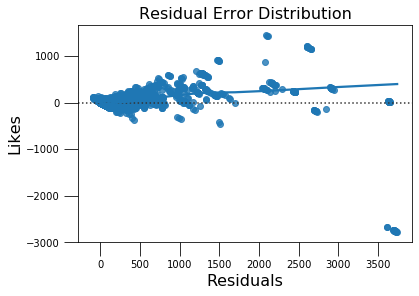

In [269]:
sns.residplot(y_pred, y_train, lowess=True)
plt.xlabel('Residuals', fontsize = 16)
plt.ylabel('Likes', fontsize = 16)
plt.title('Residual Error Distribution', fontsize = 16)
plt.tick_params(size = 14)

In [270]:
X2 = df_model.drop(columns = 'Price')
y2 = df_model.Price

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2)

In [287]:
print('Price Standard Deviation: ', y2.std())
print('Mean Price: ', y2.mean())
print('Median Price: ', y2.median())

Price Standard Deviation:  238.21904786334045
Mean Price:  140.5216
Median Price:  79.0


In [280]:
lr2 = LinearRegression()

lr2.fit(X_train2, y_train2)

y_pred2 = lr2.predict(X_train2)
y_test_pred2 = lr2.predict(X_test2)

In [282]:
print('Train RMSE: ', mean_squared_error(y_train2, y_pred2)**.5)
print('Test RMSE: ', mean_squared_error(y_test2, y_test_pred2**.5))

Train RMSE:  175.28802846948489
Test RMSE:  107490.10358848753


Pretty extreme heteroscedasticity below. My vanilla model is going to need some serious work- as shown by the RMSE on the test set above.

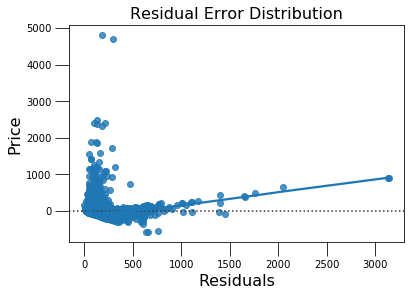

In [288]:
sns.residplot(y_pred2, y_train2, lowess=True)
plt.xlabel('Residuals', fontsize = 16)
plt.ylabel('Price', fontsize = 16)
plt.title('Residual Error Distribution', fontsize = 16)
plt.tick_params(size = 14)

In [ ]:
# PCA
# K-Means Clustering?
# VIF analysis?
# Recursive Feature Elimination?
# SVM?